In [1]:
%%bash
# check cuda, cudnn, tensorflow

nvidia-smi
nvcc -V
python -c "import tensorflow as tf;print('tensorflow version: ',tf.__version__)"

Fri May  5 14:20:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.104      Driver Version: 528.78       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   54C    P8    15W /  80W |    661MiB /  6144MiB |     31%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Make sure you are working under `training_demo/`

## Preparing the dataset

Copy `train.record` and `valid.record` under `/annotations/`.

## Training the model

In [4]:
!python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config

2023-05-03 10:50:53.359553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 10:50:53.366796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 10:50:53.367093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 10:50:53.367662: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the app

2023-05-03 10:51:05.593490: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/usr/local/lib/python3.6/dist-packages/keras/backend.py:401: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
I0503 10:51:10.465590 140593732773632 api.py:446] feature_map_spatial_dims: [(32, 32), (16, 16), (8, 8), (4, 4), (2, 2)]
I0503 10:51:18.153299 140593732773632 api.py:446] feature_map_spatial_dims: [(32, 32), (16, 16), (8, 8), (4, 4), (2, 2)]
2023-05-03 10:51:22.800698: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2023-05-03 10:51:24.805587: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplicatio

INFO:tensorflow:Step 100 per-step time 0.490s
I0503 10:52:17.144510 140603801323328 model_lib_v2.py:707] Step 100 per-step time 0.490s
INFO:tensorflow:{'Loss/classification_loss': 0.9208105,
 'Loss/localization_loss': 1.2354395,
 'Loss/regularization_loss': 3.0064318,
 'Loss/total_loss': 5.1626816,
 'learning_rate': 0.014666351}
I0503 10:52:17.144782 140603801323328 model_lib_v2.py:708] {'Loss/classification_loss': 0.9208105,
 'Loss/localization_loss': 1.2354395,
 'Loss/regularization_loss': 3.0064318,
 'Loss/total_loss': 5.1626816,
 'learning_rate': 0.014666351}
INFO:tensorflow:Step 200 per-step time 0.230s
I0503 10:52:40.188181 140603801323328 model_lib_v2.py:707] Step 200 per-step time 0.230s
INFO:tensorflow:{'Loss/classification_loss': 0.6854787,
 'Loss/localization_loss': 0.9672884,
 'Loss/regularization_loss': 2.972033,
 'Loss/total_loss': 4.6248,
 'learning_rate': 0.0159997}
I0503 10:52:40.188464 140603801323328 model_lib_v2.py:708] {'Loss/classification_loss': 0.6854787,
 'Loss

INFO:tensorflow:Step 1600 per-step time 0.240s
I0503 10:58:12.632241 140603801323328 model_lib_v2.py:707] Step 1600 per-step time 0.240s
INFO:tensorflow:{'Loss/classification_loss': 0.38582167,
 'Loss/localization_loss': 0.5632247,
 'Loss/regularization_loss': 2.2685077,
 'Loss/total_loss': 3.217554,
 'learning_rate': 0.034666598}
I0503 10:58:12.632453 140603801323328 model_lib_v2.py:708] {'Loss/classification_loss': 0.38582167,
 'Loss/localization_loss': 0.5632247,
 'Loss/regularization_loss': 2.2685077,
 'Loss/total_loss': 3.217554,
 'learning_rate': 0.034666598}
INFO:tensorflow:Step 1700 per-step time 0.229s
I0503 10:58:35.524143 140603801323328 model_lib_v2.py:707] Step 1700 per-step time 0.229s
INFO:tensorflow:{'Loss/classification_loss': 0.33996764,
 'Loss/localization_loss': 0.29366878,
 'Loss/regularization_loss': 2.2087088,
 'Loss/total_loss': 2.8423452,
 'learning_rate': 0.03599995}
I0503 10:58:35.524390 140603801323328 model_lib_v2.py:708] {'Loss/classification_loss': 0.3399

In [6]:
# Run tensorboard within a new terminal
# !tensorboard --port 6006 --host 0.0.0.0  --logdir 'models/my_ssd_resnet50_v1_fpn'

2023-05-03 08:18:35.364822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 08:18:35.372096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 08:18:35.372420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.6.0 at http://0.0.0.0:6006/ (Press CTRL+C to quit)
^C


## Exporting a trained model

In [6]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path models/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir models/my_ssd_resnet50_v1_fpn/ --output_directory exported-models/my_model

2023-05-03 12:29:27.026388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 12:29:27.031018: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 12:29:27.031303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 12:29:27.039409: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the app

## Inferencing

#### Load the test images

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

def load_images():
#     base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/'
    
    # Get the list of all files and directories
    path = "images/test/"
    dir_list = os.listdir(path)
    print("Files and directories in '", path, "' :")
    # prints all files
    print(dir_list)
    
    filenames = dir_list
    image_paths = []
    for filename in filenames:
#         image_path = tf.keras.utils.get_file(fname=filename,
#                                             origin=path + filename,
#                                             untar=False)
        image_path = pathlib.Path(path+filename)
        image_paths.append(str(image_path))
    return image_paths

IMAGE_PATHS = load_images()
print("Image_Paths", IMAGE_PATHS)

Files and directories in ' images/test/ ' :
['18.154723.134733.png', '18.154724.134733.png', '18.154725.134733.png', '18.154726.134733.png', '18.154727.134733.png', '18.154728.134733.png', '18.154729.134733.png']
Image_Paths ['images/test/18.154723.134733.png', 'images/test/18.154724.134733.png', 'images/test/18.154725.134733.png', 'images/test/18.154726.134733.png', 'images/test/18.154727.134733.png', 'images/test/18.154728.134733.png', 'images/test/18.154729.134733.png']


#### Load the model

In [8]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "exported-models/my_model/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 8.202935695648193 seconds


#### Load label map data (for plotting)

In [9]:
PATH_TO_LABELS="annotations/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

#### Putting everything together

Running inference for images/test/18.154723.134733.png... Done
Running inference for images/test/18.154724.134733.png... Done
Running inference for images/test/18.154725.134733.png... Done
Running inference for images/test/18.154726.134733.png... Done
Running inference for images/test/18.154727.134733.png... Done
Running inference for images/test/18.154728.134733.png... Done
Running inference for images/test/18.154729.134733.png... Done


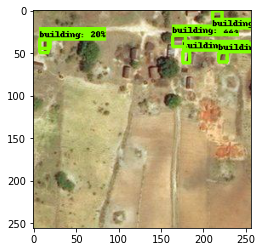

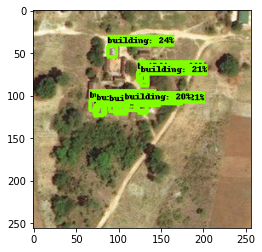

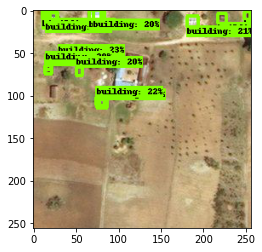

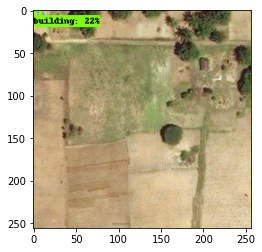

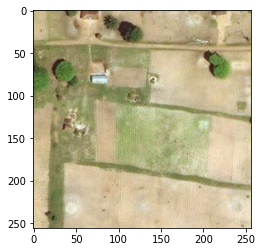

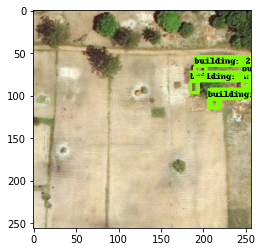

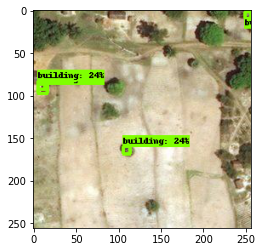

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
%matplotlib inline

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

output_dir = "images/prediction/"
if not os.path.exists(output_dir):
      os.makedirs(output_dir)

for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
#     image_np = np.tile(
#         np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
#     print("input_tensor",input_tensor)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
#     print("detections",detections)
    
    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
        
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.20,
          agnostic_mode=False)
    
#     print("image_np_with_detections", image_np_with_detections)
     # Non max suppression
    selected_indices, selected_scores = tf.image.non_max_suppression_with_scores(
        detections['detection_boxes'], 
        detections['detection_scores'], 
        detections['detection_boxes'].shape[0], 
        iou_threshold=1.0,
        score_threshold=0.6,
        soft_nms_sigma=0.5)
    
    selected_boxes = tf.gather(detections['detection_boxes'], selected_indices)
    selected_classes = tf.gather(detections['detection_classes'], selected_indices)
    
#     print("\nselected_boxes", selected_indices, selected_scores, selected_boxes)
    selected_boxes_np = selected_boxes.numpy()
    selected_classes_np = selected_classes.numpy()
    selected_scores_np = selected_scores.numpy()

    # visualization
    vis_image = viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          selected_boxes_np,
          selected_classes_np,
          selected_scores_np,
          category_index,
          use_normalized_coordinates=True,
          line_thickness=2)
    
    # image id
    task = os.path.splitext(os.path.basename(image_path))[0]
    
    # save prediction image
    output_path = output_dir + task +".png"
    viz_utils.save_image_array_as_png(vis_image, output_path)

    
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

## Calculate metrics

In [ ]:
!python evaluation_geojson.py --prediction_path="./case_study/cameroon/predictions/prediction-ensemble/merged_prediction_multi_heads_attention.geojson" --reference_path="./case_study/cameroon/reference/building_building_.geojson"